In [30]:
# Import all Required Libraries
from tensorflow.keras.applications import vgg16 ,resnet50 # Model we are trying..
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input

from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.metrics.pairwise import cosine_similarity

In [2]:

image_path = '/content/images/' 
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 3 # Number of most similar images to retrieve since we have only 20 images this can be increased

In [11]:
def get_files():
  files = [image_path + x for x in os.listdir(image_path) if "jfif" in x]
  print("No. of Images : ",len(files))
  return files

def preprocessing_images(files):
  importedImages = []

  for f in files:
      filename = f
      original = load_img(filename, target_size=(224, 224))
      numpy_image = img_to_array(original)
      image_batch = np.expand_dims(numpy_image, axis=0)
      
      importedImages.append(image_batch)
      
  images = np.vstack(importedImages)

  processed_imgs = preprocess_input(images.copy())

  return processed_imgs

In [16]:
def get_image_features(processed_imgs, extractor,model_name=""):
  """
  This function requires Processed_imgs, The Feature extractor of the model, and the Model Name
  """ 
  imgs_features = extractor.predict(processed_imgs)
  print(model_name)
  print("features successfully extracted!")
  print(imgs_features.shape)
  return imgs_features

In [18]:
def get_similarity_score(imgs_features):
  # compute cosine similarities between images

  cosSimilarities = cosine_similarity(imgs_features)

  # store the results into a pandas dataframe

  cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)

  return cos_similarities_df

In [23]:
def get_recommendation(given_img , df):
  print("===="*10)
  print("GIVEN PRODUCT\n")

  original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
  plt.imshow(original)
  plt.show()

  print("----"*10)
  print("RECOMMENDATIONS\n")

  # Get the index and scores for the top images
  closest_imgs = df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
  closest_imgs_scores = df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

  for i in range(0,len(closest_imgs)):
      # If the image shows 50% similarity then only and atmost 5 images.
      if closest_imgs_scores[i] >= 0.5:
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])
      else:
        break

  print("DONE ..........")
  print("===="*10)

In [9]:
files = get_files()

No. of Images :  20


In [14]:

processed_imgs = preprocessing_images(files)
processed_imgs.shape

(20, 224, 224, 3)

# **VGG16**

In [15]:
# Intialise weights of VGG16
vgg_model = vgg16.VGG16(weights="imagenet")
# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
# print the layers of the CNN
feat_extractor.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [17]:
image_features = get_image_features(processed_imgs,feat_extractor,"VGG16")

VGG16
features successfully extracted!
(20, 4096)


In [19]:
similarity_score_df = get_similarity_score(image_features)
similarity_score_df.head()

,/content/images/img_4.jfif,/content/images/img_16.jfif,/content/images/img_3.jfif,/content/images/img_12.jfif,/content/images/img_17.jfif,/content/images/img_13.jfif,/content/images/img_1.jfif,/content/images/img_10.jfif,/content/images/img_2.jfif,/content/images/img_8.jfif,/content/images/img_20.jfif,/content/images/img_7.jfif,/content/images/img_14.jfif,/content/images/img_19.jfif,/content/images/img_6.jfif,/content/images/img_5.jfif,/content/images/img_11.jfif,/content/images/img_15.jfif,/content/images/img_18.jfif,/content/images/img_9.jfif
/content/images/img_4.jfif,1.000000,0.291057,0.493716,0.461528,0.256072,0.227192,0.231937,0.252968,0.245666,0.513381,0.312544,0.344426,0.167155,0.256268,0.296816,0.293833,0.531505,0.180152,0.169839,0.438044
/content/images/img_16.jfif,0.291057,1.000000,0.413735,0.470867,0.427722,0.252592,0.350186,0.357572,0.361597,0.297342,0.264166,0.343849,0.298669,0.286207,0.449427,0.206766,0.335078,0.401057,0.367256,0.380714
/content/images/img_3.jfif,0.493716,0.413735,1.000000,0.420750,0.373213,0.340723,0.500887,0.509282,0.520719,0.634149,0.369435,0.420958,0.339854,0.428801,0.326003,0.462067,0.543506,0.264466,0.245578,0.642624
/content/images/img_12.jfif,0.461528,0.470867,0.420750,1.000000,0.285106,0.361403,0.238310,0.465092,0.223538,0.333780,0.233181,0.194992,0.234490,0.309939,0.409029,0.198525,0.321378,0.267788,0.301980,0.399843
/content/images/img_17.jfif,0.256072,0.427722,0.373213,0.285106,1.000000,0.176697,0.378322,0.355180,0.417232,0.363316,0.350752,0.350363,0.444549,0.263861,0.344416,0.223886,0.349101,0.394259,0.312632,0.439631


GIVEN PRODUCT



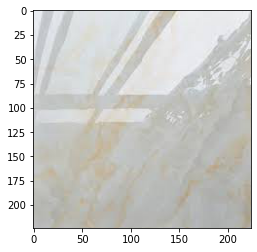

----------------------------------------
RECOMMENDATIONS



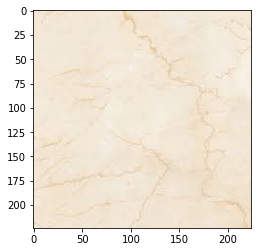

similarity score :  0.5315054


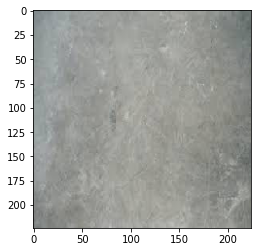

similarity score :  0.513381
DONE ..........
GIVEN PRODUCT



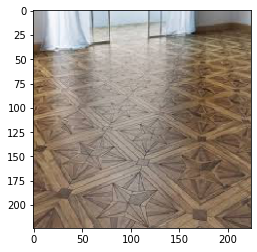

----------------------------------------
RECOMMENDATIONS

DONE ..........
GIVEN PRODUCT



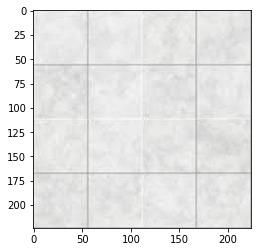

----------------------------------------
RECOMMENDATIONS



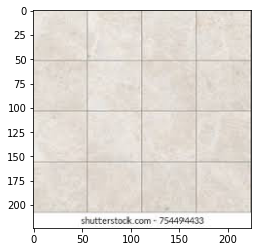

similarity score :  0.92907345


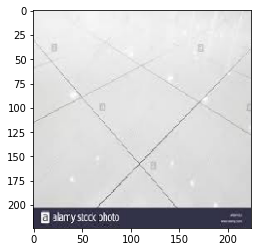

similarity score :  0.5099599


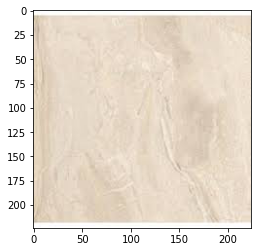

similarity score :  0.50088674
DONE ..........
GIVEN PRODUCT



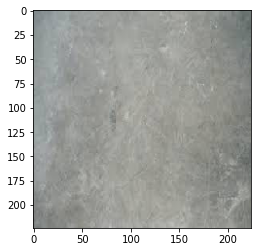

----------------------------------------
RECOMMENDATIONS



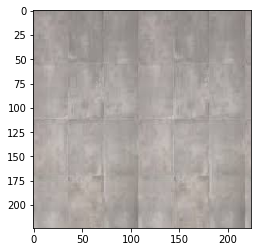

similarity score :  0.66679126


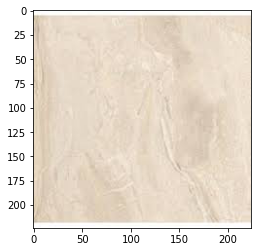

similarity score :  0.6341487


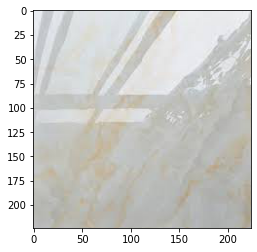

similarity score :  0.513381
DONE ..........
GIVEN PRODUCT



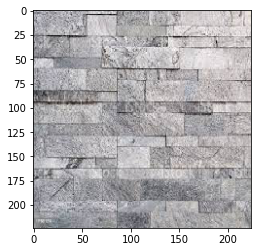

----------------------------------------
RECOMMENDATIONS



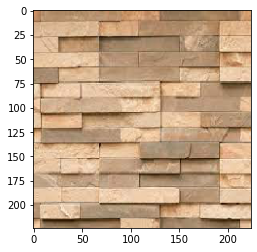

similarity score :  0.7166103


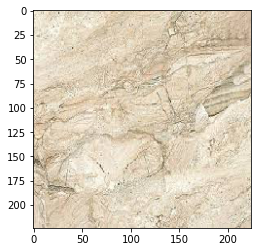

similarity score :  0.50987786
DONE ..........
GIVEN PRODUCT



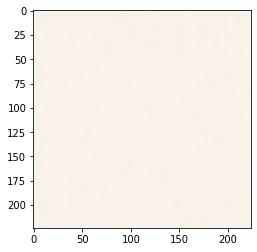

----------------------------------------
RECOMMENDATIONS

DONE ..........
GIVEN PRODUCT



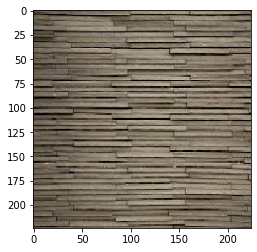

----------------------------------------
RECOMMENDATIONS



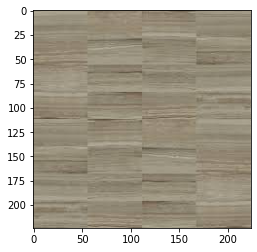

similarity score :  0.58811414


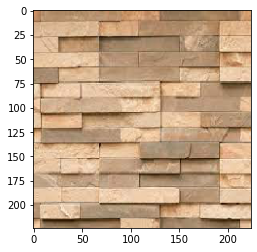

similarity score :  0.51535
DONE ..........


In [24]:
# Using VGG16
for i in [0,3,6,9,12,15,18]:
  get_recommendation(files[i],similarity_score_df)

# **RESNET50**

In [25]:
# Intialise weights of RESNET50
resnet_model = resnet50.ResNet50(weights="imagenet")
# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=resnet_model.input, outputs = resnet_model.get_layer("avg_pool").output)
# print the layers of the CNN
feat_extractor.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________

In [26]:
image_features = get_image_features(processed_imgs,feat_extractor,"RESNET50")

RESNET50
features successfully extracted!
(20, 2048)


In [27]:
similarity_score_df = get_similarity_score(image_features)
similarity_score_df.head()

,/content/images/img_4.jfif,/content/images/img_16.jfif,/content/images/img_3.jfif,/content/images/img_12.jfif,/content/images/img_17.jfif,/content/images/img_13.jfif,/content/images/img_1.jfif,/content/images/img_10.jfif,/content/images/img_2.jfif,/content/images/img_8.jfif,/content/images/img_20.jfif,/content/images/img_7.jfif,/content/images/img_14.jfif,/content/images/img_19.jfif,/content/images/img_6.jfif,/content/images/img_5.jfif,/content/images/img_11.jfif,/content/images/img_15.jfif,/content/images/img_18.jfif,/content/images/img_9.jfif
/content/images/img_4.jfif,1.000000,0.285155,0.560502,0.428264,0.248445,0.305540,0.202100,0.507105,0.252750,0.428895,0.468758,0.329964,0.165990,0.324095,0.270742,0.275616,0.460461,0.164040,0.114346,0.405752
/content/images/img_16.jfif,0.285155,1.000000,0.241544,0.429815,0.298820,0.265772,0.330263,0.362719,0.362145,0.171938,0.303679,0.351676,0.291802,0.358292,0.429998,0.138448,0.351353,0.328728,0.273736,0.259878
/content/images/img_3.jfif,0.560502,0.241544,1.000000,0.286223,0.193894,0.312533,0.289619,0.534188,0.389764,0.617958,0.568297,0.330943,0.175466,0.263451,0.232544,0.435142,0.618674,0.155514,0.087845,0.553709
/content/images/img_12.jfif,0.428264,0.429815,0.286223,1.000000,0.298940,0.397938,0.296141,0.371438,0.330499,0.279371,0.373424,0.359795,0.247319,0.424345,0.307880,0.198131,0.345147,0.230942,0.261686,0.336711
/content/images/img_17.jfif,0.248445,0.298820,0.193894,0.298940,1.000000,0.220153,0.307129,0.424079,0.355044,0.262596,0.310466,0.193754,0.705032,0.329487,0.487571,0.115734,0.347721,0.640863,0.263570,0.425294


GIVEN PRODUCT



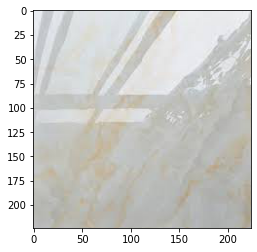

----------------------------------------
RECOMMENDATIONS



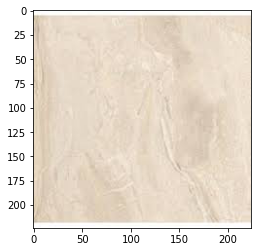

similarity score :  0.5605024


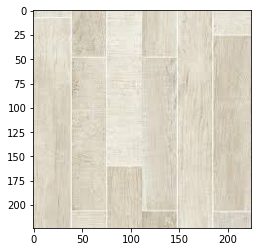

similarity score :  0.5071052
DONE ..........
GIVEN PRODUCT



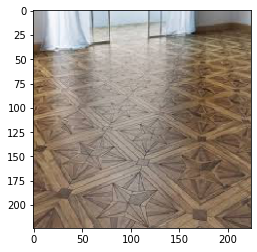

----------------------------------------
RECOMMENDATIONS

DONE ..........
GIVEN PRODUCT



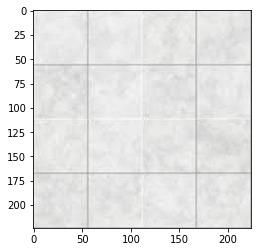

----------------------------------------
RECOMMENDATIONS



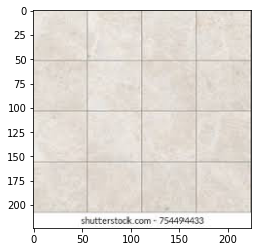

similarity score :  0.9408787


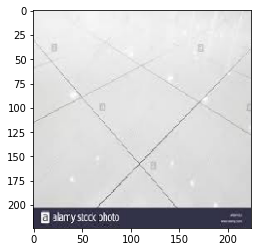

similarity score :  0.57402843


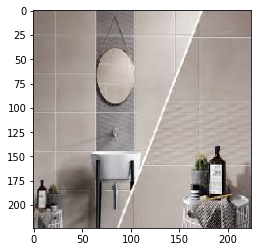

similarity score :  0.5025724
DONE ..........
GIVEN PRODUCT



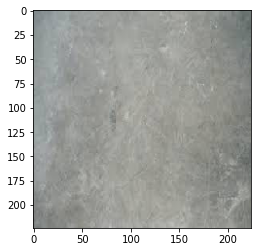

----------------------------------------
RECOMMENDATIONS



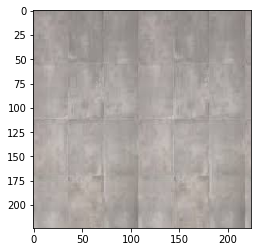

similarity score :  0.75627947


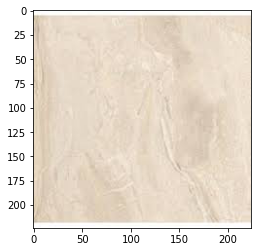

similarity score :  0.617958


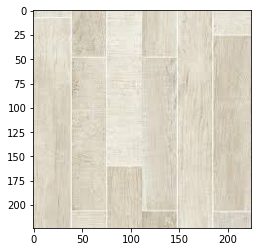

similarity score :  0.5098938
DONE ..........
GIVEN PRODUCT



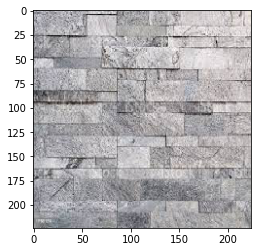

----------------------------------------
RECOMMENDATIONS



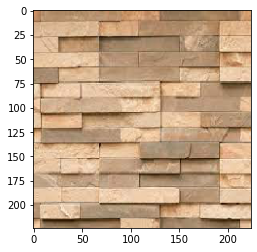

similarity score :  0.80964786


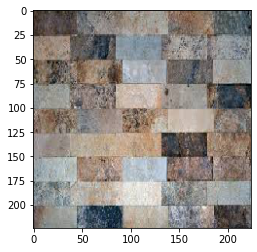

similarity score :  0.7050321


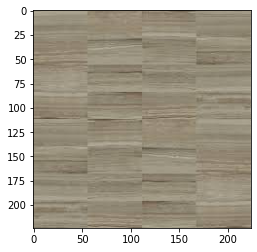

similarity score :  0.5486125
DONE ..........
GIVEN PRODUCT



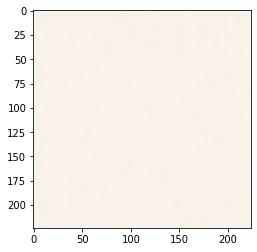

----------------------------------------
RECOMMENDATIONS

DONE ..........
GIVEN PRODUCT



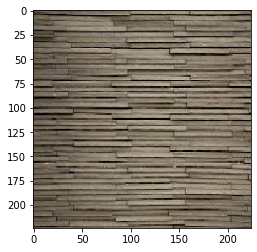

----------------------------------------
RECOMMENDATIONS



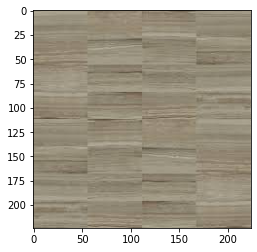

similarity score :  0.64622134
DONE ..........


In [28]:
# Using RESNET50
for i in [0,3,6,9,12,15,18]:
  get_recommendation(files[i],similarity_score_df)

## From above 2 Models , Visually RESNET50 is giving us good recommendations, So its better to go with RESNET50, THANKYOU.